In [10]:
import warnings
warnings.filterwarnings("ignore") 

In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import timedelta,datetime
df=pd.read_csv('C:\\workplace\\electricity_demand\\dataset\\AEP_hourly.csv')
df.columns=['date_time','aep_mw']
df['date_time']=pd.to_datetime(df['date_time'])
df.sort_values('date_time',ascending=True,inplace=True)
df['date_time']=df['date_time'].astype(str)

In [12]:
def preparion_train (df,num_lags,lag_feature,trigerred_time):

    df_lags=pd.DataFrame(index=df.index,columns=['lags_{}'.format(i) for i in range(num_lags)])
    for i in range(num_lags):
        df_lags['lags_{}'.format(i)]=df[lag_feature].shift(i)
    
    df_targets=pd.DataFrame(index=df.index,columns=['step_{}'.format(i) for i in range(16,40)])
    for i in range(16,40):
        df_targets['step_{}'.format(i)]=df[lag_feature].shift(-i)
    
    df_processed=pd.concat([df[['date_time']],df_targets,df_lags],axis=1)
    #df_processed=df_processed[pd.to_datetime(df_processed['date_time']).dt.hour==trigerred_time]
    return df_processed.dropna()

In [13]:
df_prcessed=preparion_train(df,168*4,'aep_mw',8)
df_prcessed

,date_time,step_16,step_17,step_18,step_19,step_20,step_21,step_22,step_23,step_24,...,lags_662,lags_663,lags_664,lags_665,lags_666,lags_667,lags_668,lags_669,lags_670,lags_671
1558,2004-10-29 00:00:00,15071.0,15134.0,14942.0,15103.0,15460.0,15198.0,14782.0,14057.0,13084.0,...,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11935.0,12379.0
1511,2004-10-29 01:00:00,15134.0,14942.0,15103.0,15460.0,15198.0,14782.0,14057.0,13084.0,12200.0,...,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11935.0
1512,2004-10-29 02:00:00,14942.0,15103.0,15460.0,15198.0,14782.0,14057.0,13084.0,12200.0,11676.0,...,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0
1513,2004-10-29 03:00:00,15103.0,15460.0,15198.0,14782.0,14057.0,13084.0,12200.0,11676.0,11297.0,...,15404.0,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0
1514,2004-10-29 04:00:00,15460.0,15198.0,14782.0,14057.0,13084.0,12200.0,11676.0,11297.0,11036.0,...,15655.0,15404.0,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116166,2018-08-01 05:00:00,16457.0,16197.0,15259.0,14125.0,13286.0,12587.0,12296.0,12059.0,12224.0,...,20503.0,20276.0,19811.0,19030.0,17847.0,16291.0,14623.0,13362.0,12789.0,13036.0
116167,2018-08-01 06:00:00,16197.0,15259.0,14125.0,13286.0,12587.0,12296.0,12059.0,12224.0,12781.0,...,20606.0,20503.0,20276.0,19811.0,19030.0,17847.0,16291.0,14623.0,13362.0,12789.0
116168,2018-08-01 07:00:00,15259.0,14125.0,13286.0,12587.0,12296.0,12059.0,12224.0,12781.0,13661.0,...,20494.0,20606.0,20503.0,20276.0,19811.0,19030.0,17847.0,16291.0,14623.0,13362.0
116169,2018-08-01 08:00:00,14125.0,13286.0,12587.0,12296.0,12059.0,12224.0,12781.0,13661.0,14326.0,...,20169.0,20494.0,20606.0,20503.0,20276.0,19811.0,19030.0,17847.0,16291.0,14623.0


In [14]:
train_df=df_prcessed[df_prcessed['date_time']<='2017-08-02 23:00:00']
X_train=train_df[train_df.columns[train_df.columns.str.contains('lags_')]]
y_train=train_df[train_df.columns[train_df.columns.str.contains('step_')]]

In [15]:
test_df=df_prcessed[(df_prcessed['date_time']>'2017-08-02 23:00:00') & (pd.to_datetime(df_prcessed['date_time']).dt.hour==8)]
X_test=test_df[test_df.columns[test_df.columns.str.contains('lags_')]]
y_test=test_df[test_df.columns[test_df.columns.str.contains('step_')]]

In [16]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler().fit(X_train)
X_train_s=scaler.transform(X_train)
X_test_s=scaler.transform(X_test)
scaler_y=MinMaxScaler().fit(y_train)
y_train_s=scaler_y.transform(y_train)
y_test_s=scaler_y.transform(y_test)

In [17]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.losses import MeanAbsoluteError 
from tensorflow.keras.optimizers import Adam

In [18]:
model=Sequential()
model.add(Input(X_train.shape[1],))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=24))
model.compile(optimizer=Adam(learning_rate=0.01),loss=MeanAbsoluteError())
model.fit(X_train_s,y_train,epochs=10,validation_data=(X_test_s,y_test))
pred=model.predict(X_test_s)

Epoch 1/10
3496/3496 [==============================] - 10s 3ms/step - loss: 2354.9102 - val_loss: 1619.6234
Epoch 2/10
3496/3496 [==============================] - 9s 3ms/step - loss: 1145.6837 - val_loss: 1069.0450
Epoch 3/10
3496/3496 [==============================] - 10s 3ms/step - loss: 914.9894 - val_loss: 990.2781
Epoch 4/10
3496/3496 [==============================] - 9s 2ms/step - loss: 894.4586 - val_loss: 1035.9631
Epoch 5/10
3496/3496 [==============================] - 10s 3ms/step - loss: 882.9045 - val_loss: 971.2246
Epoch 6/10
3496/3496 [==============================] - 14s 4ms/step - loss: 875.7420 - val_loss: 971.2831
Epoch 7/10
3496/3496 [==============================] - 16s 4ms/step - loss: 871.8901 - val_loss: 974.0036
Epoch 8/10
3496/3496 [==============================] - 13s 4ms/step - loss: 864.3881 - val_loss: 965.4824
Epoch 9/10
3496/3496 [==============================] - 12s 4ms/step - loss: 863.2509 - val_loss: 1018.4838
Epoch 10/10
12/12 [==============

In [19]:
pred2=pred.reshape(-1)

In [20]:
pred2=pd.Series(pred2)

In [21]:
pred2.describe()

count     8736.000000
mean     15005.809570
std       2216.212646
min       9642.301758
25%      13396.257812
50%      14904.151855
75%      16475.791992
max      22337.765625
dtype: float64

In [25]:
y_test2=pd.Series(np.array(y_test).reshape(-1))

<Axes: >

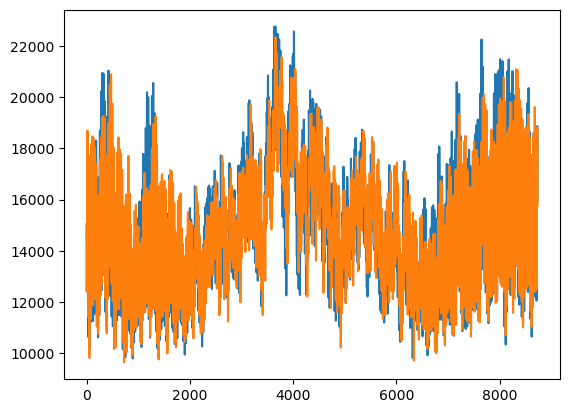

In [26]:
y_test2.plot()
pred2.plot()

In [27]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test2,pred2)

0.0629968640880487

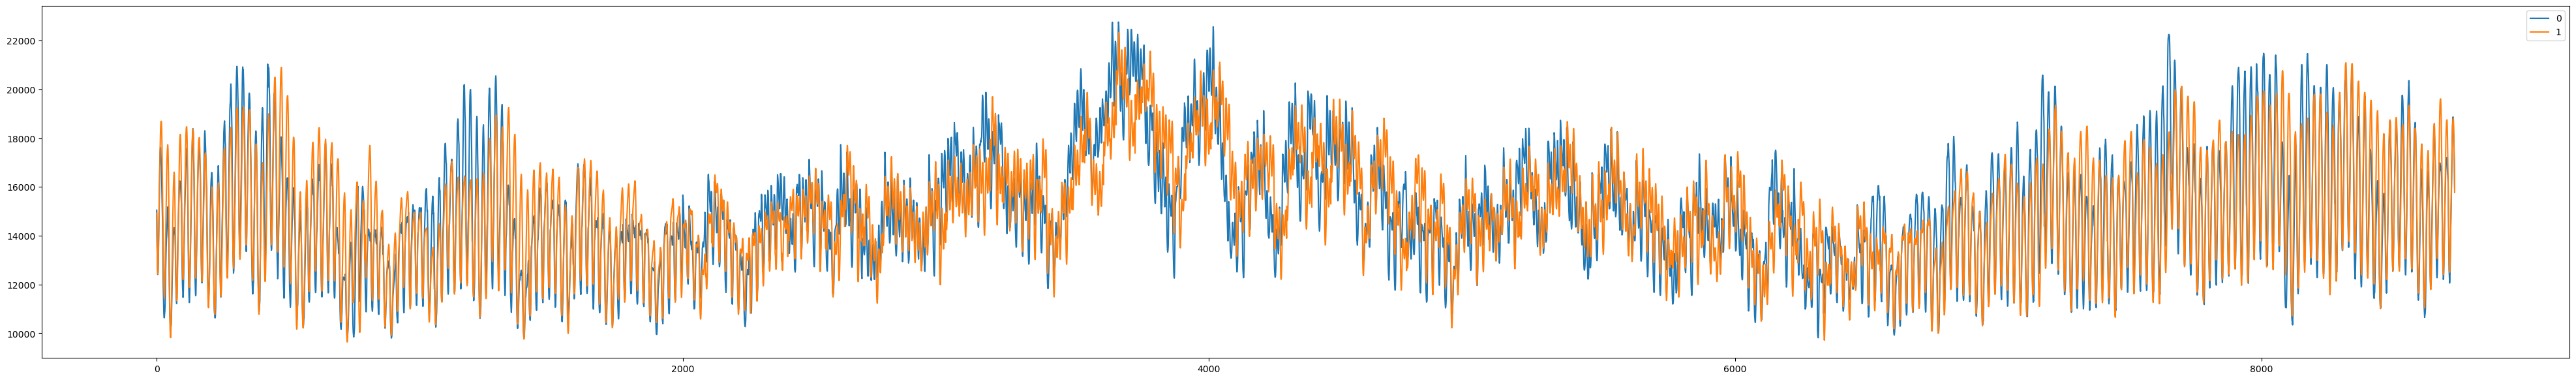

In [34]:
pred_df=pd.concat([y_test2,pred2],axis=1)
pred_df.plot(figsize=(50,7))
pred_df.columns=['aep_mw','forecast']

In [35]:
X_test

,lags_0,lags_1,lags_2,lags_3,lags_4,lags_5,lags_6,lags_7,lags_8,lags_9,...,lags_662,lags_663,lags_664,lags_665,lags_666,lags_667,lags_668,lags_669,lags_670,lags_671
110986,14240.0,13486.0,12714.0,12286.0,12213.0,12443.0,12841.0,13682.0,14812.0,16100.0,...,18232.0,18268.0,18252.0,17960.0,17712.0,17260.0,16773.0,16237.0,15524.0,14929.0
110962,14356.0,13737.0,12997.0,12539.0,12410.0,12624.0,13230.0,13940.0,15045.0,16262.0,...,17234.0,17383.0,17432.0,17887.0,18408.0,17995.0,17406.0,16634.0,15793.0,14917.0
110938,11201.0,10906.0,10795.0,10637.0,10639.0,10838.0,11339.0,11870.0,12732.0,13866.0,...,16370.0,16403.0,16226.0,15921.0,15506.0,15104.0,14454.0,13876.0,13227.0,12367.0
110914,10611.0,10341.0,10267.0,10214.0,10231.0,10503.0,10746.0,11255.0,12181.0,12977.0,...,16767.0,16426.0,15896.0,15453.0,15035.0,14500.0,13891.0,13214.0,12416.0,11534.0
110890,13566.0,12966.0,11984.0,11456.0,11215.0,11301.0,11497.0,11912.0,12477.0,13345.0,...,18183.0,18227.0,18151.0,18139.0,17592.0,16911.0,16295.0,15621.0,15060.0,14446.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116265,12022.0,11619.0,11571.0,11354.0,11518.0,11765.0,12167.0,12886.0,13885.0,15095.0,...,20745.0,20685.0,20433.0,20009.0,19627.0,19001.0,17932.0,17016.0,15664.0,14336.0
116241,10966.0,10812.0,10748.0,10649.0,10862.0,11124.0,11523.0,12177.0,13017.0,14094.0,...,20871.0,20924.0,20726.0,20374.0,20012.0,19272.0,18277.0,17012.0,15715.0,14158.0
116217,14033.0,13474.0,12559.0,12109.0,11938.0,12096.0,12397.0,12927.0,13680.0,14665.0,...,19954.0,20159.0,20382.0,20811.0,21045.0,20444.0,19501.0,18541.0,17394.0,16355.0
116193,14554.0,13871.0,12926.0,12498.0,12275.0,12382.0,12787.0,13501.0,14363.0,15592.0,...,21448.0,21481.0,21367.0,21321.0,20999.0,20328.0,19283.0,18207.0,16991.0,15838.0


In [36]:
import plotly.graph_objects as go
figure=go.Figure()
figure.add_trace(go.Scatter(y=pred_df['aep_mw'],name='actual_electricity_load'))
figure.add_trace(go.Scatter(y=pred_df['forecast'],name='mlp_forecast'))

In [31]:
df[df['date_time']>'2017-08-02 23:00:00']

,date_time,aep_mw
111026,2017-08-03 00:00:00,14812.0
110979,2017-08-03 01:00:00,13682.0
110980,2017-08-03 02:00:00,12841.0
110981,2017-08-03 03:00:00,12443.0
110982,2017-08-03 04:00:00,12213.0
...,...,...
116157,2018-08-02 20:00:00,17673.0
116158,2018-08-02 21:00:00,17303.0
116159,2018-08-02 22:00:00,17001.0
116160,2018-08-02 23:00:00,15964.0
